## Importando os Pacotes

In [124]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd


## Carregando os dados das ações

In [125]:
acoes = {
    'ITAUSA':yf.Ticker('ITSA4.SA'),
    'VALE':yf.Ticker('VALE3.SA'),
    'B3':yf.Ticker('B3SA3.SA'),
    'FLEURY':yf.Ticker('FLRY3.SA'),
    'BANCO DO BRASIL':yf.Ticker('BBAS3.SA'),
    'HYPERA':yf.Ticker('HYPE3.SA'),
    'RAIA DROGASIL':yf.Ticker('RADL3.SA'),
    'WEG':yf.Ticker('WEGE3.SA'),
    'PETROBRAS':yf.Ticker('PETR4.SA'),
    'ALUPAR':yf.Ticker('ALUP11.SA'),
    'COPEL':yf.Ticker('CPLE6.SA'),
    'MULTIPLAN':yf.Ticker('MULT3.SA'),
    'TELEFÔNICA':yf.Ticker('VIVT3.SA'),
    'AMBEV':yf.Ticker('ABEV3.SA'),
    'ENGIE':yf.Ticker('EGIE3.SA'),
    'BRADESCO':yf.Ticker('BBDC3.SA'),
    'BTG PACTUAL':yf.Ticker('BPAC11.SA'),
    'ITAU':yf.Ticker('ITUB3.SA'),
    'EZTEC':yf.Ticker('EZTC3.SA'),
    'AREZZO':yf.Ticker('ARZZ3.SA')
}

## Organizando o DataFrame com as informações de cada ação

In [126]:
data_acoes = []
for acao in acoes:
    data = {}
    data['Ação'] = acao
    data['Valor investido'] = 1000
    data['Quantidade'] = data['Valor investido'] / acoes[acao].history(period='5y').iloc[0]['Close']
    data['Valor final'] = data['Quantidade'] * acoes[acao].history(period='5y').iloc[-1]['Close']
    data['Rentabilidade geral'] = (data['Valor final'] / data['Valor investido'] - 1)
    data['Valor por dia'] = data['Quantidade'] * acoes[acao].history(period='5y')['Close']
    data['Rentabilidade diária'] = data['Valor por dia'].ffill(axis=0).pct_change()
    data['Desvio padrão diário'] = data['Rentabilidade diária'].std()
    data['Índice Sharpee'] = data['Rentabilidade geral'] / data['Desvio padrão diário']
    data_acoes.append(data)

## Primeira ação do portfólio é a Telefônica

In [127]:
portfolio = 0

portfolio += data_acoes[12]['Valor por dia'] # TELEFÔNICA - Setor de telecomunicações

portfolio

Date
2018-10-05 00:00:00-03:00    1000.000220
2018-10-08 00:00:00-03:00    1026.716830
2018-10-09 00:00:00-03:00     991.450614
2018-10-10 00:00:00-03:00     988.511983
2018-10-11 00:00:00-03:00     984.237070
                                ...     
2023-09-29 00:00:00-03:00    1663.007409
2023-10-02 00:00:00-03:00    1683.804665
2023-10-03 00:00:00-03:00    1684.574950
2023-10-04 00:00:00-03:00    1702.676135
2023-10-05 00:00:00-03:00    1713.845048
Name: Close, Length: 1240, dtype: float64

In [128]:
df_corr = pd.DataFrame()
df_corr['Portfólio'] = portfolio.ffill(axis=0).pct_change() # Rentabilidade diária do portfólio
df_corr['ITAUSA'] = data_acoes[0]['Rentabilidade diária']
df_corr['VALE'] = data_acoes[1]['Rentabilidade diária']
df_corr['B3'] = data_acoes[2]['Rentabilidade diária']
df_corr['FLEURY'] = data_acoes[3]['Rentabilidade diária']
df_corr['BANCO DO BRASIL'] = data_acoes[4]['Rentabilidade diária']
df_corr['HYPERA'] = data_acoes[5]['Rentabilidade diária']
df_corr['RAIA DROGASIL'] = data_acoes[6]['Rentabilidade diária']
df_corr['WEG'] = data_acoes[7]['Rentabilidade diária']
df_corr['PETROBRAS'] = data_acoes[8]['Rentabilidade diária']
df_corr['ALUPAR'] = data_acoes[9]['Rentabilidade diária']
df_corr['COPEL'] = data_acoes[10]['Rentabilidade diária']
df_corr['MULTIPLAN'] = data_acoes[11]['Rentabilidade diária']
df_corr['TELEFÔNICA'] = data_acoes[12]['Rentabilidade diária'] # 1a ação do portfólio
df_corr['AMBEV'] = data_acoes[13]['Rentabilidade diária']
df_corr['ENGIE'] = data_acoes[14]['Rentabilidade diária']
df_corr['BRADESCO'] = data_acoes[15]['Rentabilidade diária']
df_corr['BTG PACTUAL'] = data_acoes[16]['Rentabilidade diária']
df_corr['ITAU'] = data_acoes[17]['Rentabilidade diária']
df_corr['EZTEC'] = data_acoes[18]['Rentabilidade diária']
df_corr['AREZZO'] = data_acoes[19]['Rentabilidade diária']

df_corr.corr().iloc[0] # Correlação do portfólio com as outras ações

Portfólio          1.000000
ITAUSA             0.416995
VALE               0.212133
B3                 0.371984
FLEURY             0.301604
BANCO DO BRASIL    0.366604
HYPERA             0.379946
RAIA DROGASIL      0.296084
WEG                0.256828
PETROBRAS          0.296234
ALUPAR             0.372297
COPEL              0.438474
MULTIPLAN          0.412839
TELEFÔNICA         1.000000
AMBEV              0.372433
ENGIE              0.476251
BRADESCO           0.384406
BTG PACTUAL        0.345403
ITAU               0.361071
EZTEC              0.372120
AREZZO             0.312856
Name: Portfólio, dtype: float64

## Segunda ação do portfólio é a Vale, pois tinha a correlação mais próxima de zero com o portfólio

In [129]:
portfolio += data_acoes[1]['Valor por dia'] # VALE - Setor de mineração

portfolio

Date
2018-10-05 00:00:00-03:00    2000.000124
2018-10-08 00:00:00-03:00    2019.063167
2018-10-09 00:00:00-03:00    1995.103205
2018-10-10 00:00:00-03:00    1960.680939
2018-10-11 00:00:00-03:00    1966.668668
                                ...     
2023-09-29 00:00:00-03:00    3369.356697
2023-10-02 00:00:00-03:00    3375.256752
2023-10-03 00:00:00-03:00    3365.674915
2023-10-04 00:00:00-03:00    3365.849104
2023-10-05 00:00:00-03:00    3387.117592
Name: Close, Length: 1240, dtype: float64

In [130]:
df_corr = pd.DataFrame()
df_corr['Portfólio'] = portfolio.ffill(axis=0).pct_change() # Rentabilidade diária do portfólio
df_corr['ITAUSA'] = data_acoes[0]['Rentabilidade diária']
df_corr['VALE'] = data_acoes[1]['Rentabilidade diária'] # 2a ação do portfólio
df_corr['B3'] = data_acoes[2]['Rentabilidade diária']
df_corr['FLEURY'] = data_acoes[3]['Rentabilidade diária']
df_corr['BANCO DO BRASIL'] = data_acoes[4]['Rentabilidade diária']
df_corr['HYPERA'] = data_acoes[5]['Rentabilidade diária']
df_corr['RAIA DROGASIL'] = data_acoes[6]['Rentabilidade diária']
df_corr['WEG'] = data_acoes[7]['Rentabilidade diária']
df_corr['PETROBRAS'] = data_acoes[8]['Rentabilidade diária']
df_corr['ALUPAR'] = data_acoes[9]['Rentabilidade diária']
df_corr['COPEL'] = data_acoes[10]['Rentabilidade diária']
df_corr['MULTIPLAN'] = data_acoes[11]['Rentabilidade diária']
df_corr['TELEFÔNICA'] = data_acoes[12]['Rentabilidade diária'] # 1a ação do portfólio
df_corr['AMBEV'] = data_acoes[13]['Rentabilidade diária']
df_corr['ENGIE'] = data_acoes[14]['Rentabilidade diária']
df_corr['BRADESCO'] = data_acoes[15]['Rentabilidade diária']
df_corr['BTG PACTUAL'] = data_acoes[16]['Rentabilidade diária']
df_corr['ITAU'] = data_acoes[17]['Rentabilidade diária']
df_corr['EZTEC'] = data_acoes[18]['Rentabilidade diária']
df_corr['AREZZO'] = data_acoes[19]['Rentabilidade diária']

df_corr.corr().iloc[0] # Correlação do portfólio com as outras ações

Portfólio          1.000000
ITAUSA             0.471612
VALE               0.828060
B3                 0.406234
FLEURY             0.287573
BANCO DO BRASIL    0.449248
HYPERA             0.365478
RAIA DROGASIL      0.224078
WEG                0.303348
PETROBRAS          0.472245
ALUPAR             0.352706
COPEL              0.423111
MULTIPLAN          0.391316
TELEFÔNICA         0.705862
AMBEV              0.332149
ENGIE              0.409604
BRADESCO           0.469782
BTG PACTUAL        0.401859
ITAU               0.420139
EZTEC              0.348869
AREZZO             0.331016
Name: Portfólio, dtype: float64

## Terceira ação do portfólio é a RAIA DROGASIL, pois tinha a correlação mais próxima de zero com o portfólio

In [131]:
portfolio += data_acoes[6]['Valor por dia'] # RAIA DROGASIL - Setor de farmácias

portfolio

Date
2018-10-05 00:00:00-03:00    3000.000053
2018-10-08 00:00:00-03:00    3039.681868
2018-10-09 00:00:00-03:00    3002.388164
2018-10-10 00:00:00-03:00    2947.210113
2018-10-11 00:00:00-03:00    2894.228692
                                ...     
2023-09-29 00:00:00-03:00    5429.965717
2023-10-02 00:00:00-03:00    5417.960370
2023-10-03 00:00:00-03:00    5388.981108
2023-10-04 00:00:00-03:00    5432.426639
2023-10-05 00:00:00-03:00    5444.212341
Name: Close, Length: 1240, dtype: float64

In [132]:
df_corr = pd.DataFrame()
df_corr['Portfólio'] = portfolio.ffill(axis=0).pct_change() # Rentabilidade diária do portfólio
df_corr['ITAUSA'] = data_acoes[0]['Rentabilidade diária']
df_corr['VALE'] = data_acoes[1]['Rentabilidade diária'] # 2a ação do portfólio
df_corr['B3'] = data_acoes[2]['Rentabilidade diária']
df_corr['FLEURY'] = data_acoes[3]['Rentabilidade diária']
df_corr['BANCO DO BRASIL'] = data_acoes[4]['Rentabilidade diária']
df_corr['HYPERA'] = data_acoes[5]['Rentabilidade diária']
df_corr['RAIA DROGASIL'] = data_acoes[6]['Rentabilidade diária'] # 3a ação do portfólio
df_corr['WEG'] = data_acoes[7]['Rentabilidade diária']
df_corr['PETROBRAS'] = data_acoes[8]['Rentabilidade diária']
df_corr['ALUPAR'] = data_acoes[9]['Rentabilidade diária']
df_corr['COPEL'] = data_acoes[10]['Rentabilidade diária']
df_corr['MULTIPLAN'] = data_acoes[11]['Rentabilidade diária']
df_corr['TELEFÔNICA'] = data_acoes[12]['Rentabilidade diária'] # 1a ação do portfólio
df_corr['AMBEV'] = data_acoes[13]['Rentabilidade diária']
df_corr['ENGIE'] = data_acoes[14]['Rentabilidade diária']
df_corr['BRADESCO'] = data_acoes[15]['Rentabilidade diária']
df_corr['BTG PACTUAL'] = data_acoes[16]['Rentabilidade diária']
df_corr['ITAU'] = data_acoes[17]['Rentabilidade diária']
df_corr['EZTEC'] = data_acoes[18]['Rentabilidade diária']
df_corr['AREZZO'] = data_acoes[19]['Rentabilidade diária']

df_corr.corr().iloc[0] # Correlação do portfólio com as outras ações

Portfólio          1.000000
ITAUSA             0.528355
VALE               0.681580
B3                 0.505754
FLEURY             0.425975
BANCO DO BRASIL    0.480791
HYPERA             0.477181
RAIA DROGASIL      0.670931
WEG                0.442588
PETROBRAS          0.481591
ALUPAR             0.435397
COPEL              0.477402
MULTIPLAN          0.488575
TELEFÔNICA         0.674129
AMBEV              0.447473
ENGIE              0.469270
BRADESCO           0.511441
BTG PACTUAL        0.460456
ITAU               0.490888
EZTEC              0.456817
AREZZO             0.451186
Name: Portfólio, dtype: float64

## Quarta ação do portfólio é a FLEURY, pois tinha a correlação mais próxima de zero com o portfólio

In [133]:
portfolio += data_acoes[3]['Valor por dia'] # FLEURY - Setor de laboratórios

portfolio

Date
2018-10-05 00:00:00-03:00    4000.000281
2018-10-08 00:00:00-03:00    4077.966188
2018-10-09 00:00:00-03:00    4042.517608
2018-10-10 00:00:00-03:00    3948.594013
2018-10-11 00:00:00-03:00    3890.538673
                                ...     
2023-09-29 00:00:00-03:00    6335.871823
2023-10-02 00:00:00-03:00    6354.362340
2023-10-03 00:00:00-03:00    6345.713654
2023-10-04 00:00:00-03:00    6380.189840
2023-10-05 00:00:00-03:00    6392.573456
Name: Close, Length: 1240, dtype: float64

In [134]:
df_corr = pd.DataFrame()
df_corr['Portfólio'] = portfolio.ffill(axis=0).pct_change() # Rentabilidade diária do portfólio
df_corr['ITAUSA'] = data_acoes[0]['Rentabilidade diária']
df_corr['VALE'] = data_acoes[1]['Rentabilidade diária'] # 2a ação do portfólio
df_corr['B3'] = data_acoes[2]['Rentabilidade diária']
df_corr['FLEURY'] = data_acoes[3]['Rentabilidade diária'] # 4a ação do portfólio
df_corr['BANCO DO BRASIL'] = data_acoes[4]['Rentabilidade diária']
df_corr['HYPERA'] = data_acoes[5]['Rentabilidade diária']
df_corr['RAIA DROGASIL'] = data_acoes[6]['Rentabilidade diária'] # 3a ação do portfólio
df_corr['WEG'] = data_acoes[7]['Rentabilidade diária']
df_corr['PETROBRAS'] = data_acoes[8]['Rentabilidade diária']
df_corr['ALUPAR'] = data_acoes[9]['Rentabilidade diária']
df_corr['COPEL'] = data_acoes[10]['Rentabilidade diária']
df_corr['MULTIPLAN'] = data_acoes[11]['Rentabilidade diária']
df_corr['TELEFÔNICA'] = data_acoes[12]['Rentabilidade diária'] # 1a ação do portfólio
df_corr['AMBEV'] = data_acoes[13]['Rentabilidade diária']
df_corr['ENGIE'] = data_acoes[14]['Rentabilidade diária']
df_corr['BRADESCO'] = data_acoes[15]['Rentabilidade diária']
df_corr['BTG PACTUAL'] = data_acoes[16]['Rentabilidade diária']
df_corr['ITAU'] = data_acoes[17]['Rentabilidade diária']
df_corr['EZTEC'] = data_acoes[18]['Rentabilidade diária']
df_corr['AREZZO'] = data_acoes[19]['Rentabilidade diária']

df_corr.corr().iloc[0] # Correlação do portfólio com as outras ações

Portfólio          1.000000
ITAUSA             0.577413
VALE               0.626223
B3                 0.573638
FLEURY             0.667006
BANCO DO BRASIL    0.543071
HYPERA             0.536416
RAIA DROGASIL      0.681249
WEG                0.499472
PETROBRAS          0.520353
ALUPAR             0.477793
COPEL              0.527839
MULTIPLAN          0.563495
TELEFÔNICA         0.642387
AMBEV              0.493099
ENGIE              0.521419
BRADESCO           0.565590
BTG PACTUAL        0.522519
ITAU               0.540729
EZTEC              0.532481
AREZZO             0.524797
Name: Portfólio, dtype: float64

## Quinta ação do portfólio é a ALUPAR, pois tinha a correlação mais próxima de zero com o portfólio

In [135]:
portfolio += data_acoes[9]['Valor por dia'] # ALUPAR - Setor de energia

portfolio

Date
2018-10-05 00:00:00-03:00    5000.000356
2018-10-08 00:00:00-03:00    5079.819192
2018-10-09 00:00:00-03:00    5048.694211
2018-10-10 00:00:00-03:00    4941.182149
2018-10-11 00:00:00-03:00    4867.067522
                                ...     
2023-09-29 00:00:00-03:00    8590.687852
2023-10-02 00:00:00-03:00    8580.169891
2023-10-03 00:00:00-03:00    8554.273015
2023-10-04 00:00:00-03:00    8626.381698
2023-10-05 00:00:00-03:00    8645.037398
Name: Close, Length: 1240, dtype: float64

## Organizando DataFrame do portfólio

In [136]:
acoes_portfolio ={
    'TELEFÔNICA':yf.Ticker('VIVT3.SA'),
    'VALE':yf.Ticker('VALE3.SA'),
    'RAIA DROGASIL':yf.Ticker('RADL3.SA'),
    'FLEURY':yf.Ticker('FLRY3.SA'),
    'ALUPAR':yf.Ticker('ALUP11.SA')
    }


In [137]:
data_portfolio = []
for acao in acoes_portfolio:
    data = {}
    data['Ação'] = acao
    data['Valor investido'] = 1000
    data['Quantidade'] = data['Valor investido'] / acoes[acao].history(period='5y').iloc[0]['Close']
    data['Valor final'] = data['Quantidade'] * acoes[acao].history(period='5y').iloc[-1]['Close']
    data['Rentabilidade geral'] = (data['Valor final'] / data['Valor investido'] - 1)
    data['Valor por dia'] = data['Quantidade'] * acoes[acao].history(period='5y')['Close']
    data['Rentabilidade diária'] = data['Valor por dia'].ffill(axis=0).pct_change()
    data['Desvio padrão diário'] = data['Rentabilidade diária'].std()
    data['Índice Sharpee'] = data['Rentabilidade geral'] / data['Desvio padrão diário']
    data_portfolio.append(data)


In [138]:
portfolio = 0
for i in range(len(data_portfolio)):
    portfolio += data_portfolio[i]['Valor por dia']
portfolio

Date
2018-10-05 00:00:00-03:00    4999.999743
2018-10-08 00:00:00-03:00    5079.818516
2018-10-09 00:00:00-03:00    5048.694054
2018-10-10 00:00:00-03:00    4941.181399
2018-10-11 00:00:00-03:00    4867.067746
                                ...     
2023-09-29 00:00:00-03:00    8590.687486
2023-10-02 00:00:00-03:00    8580.169509
2023-10-03 00:00:00-03:00    8554.272625
2023-10-04 00:00:00-03:00    8626.381302
2023-10-05 00:00:00-03:00    8643.734761
Name: Close, Length: 1240, dtype: float64

## Visualizando retornos do portfólio e das ações ao longo do período de 5 anos

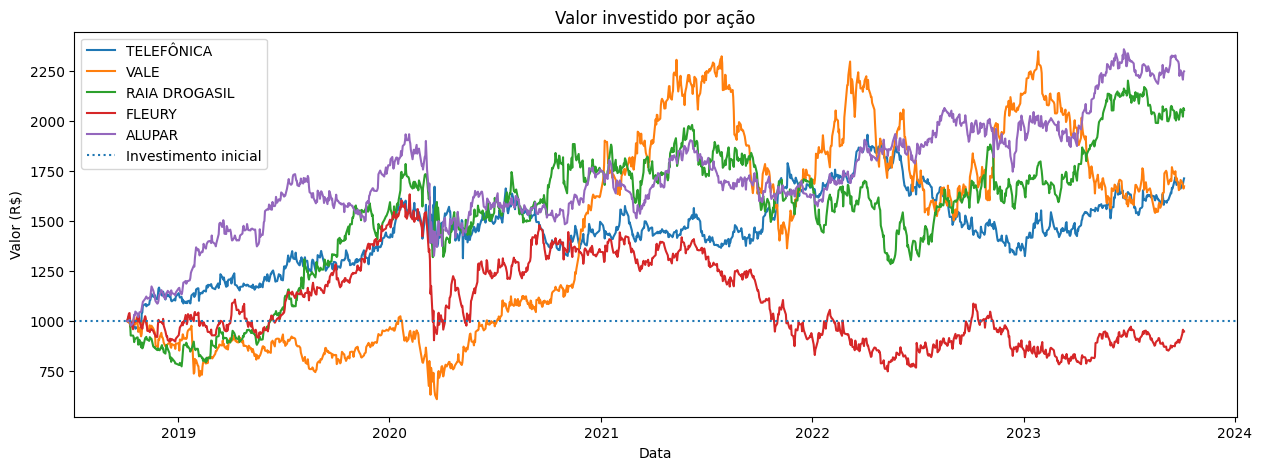

In [139]:
plt.figure(figsize=(15,5))
for i in range(len(data_portfolio)):
    plt.plot(data_portfolio[i]['Valor por dia'], label=data_portfolio[i]['Ação'])
plt.axhline(data['Valor investido'], linestyle=':', label='Investimento inicial')
plt.title('Valor investido por ação')
plt.ylabel('Valor (R\$)')
plt.xlabel('Data')
plt.legend()
plt.show()

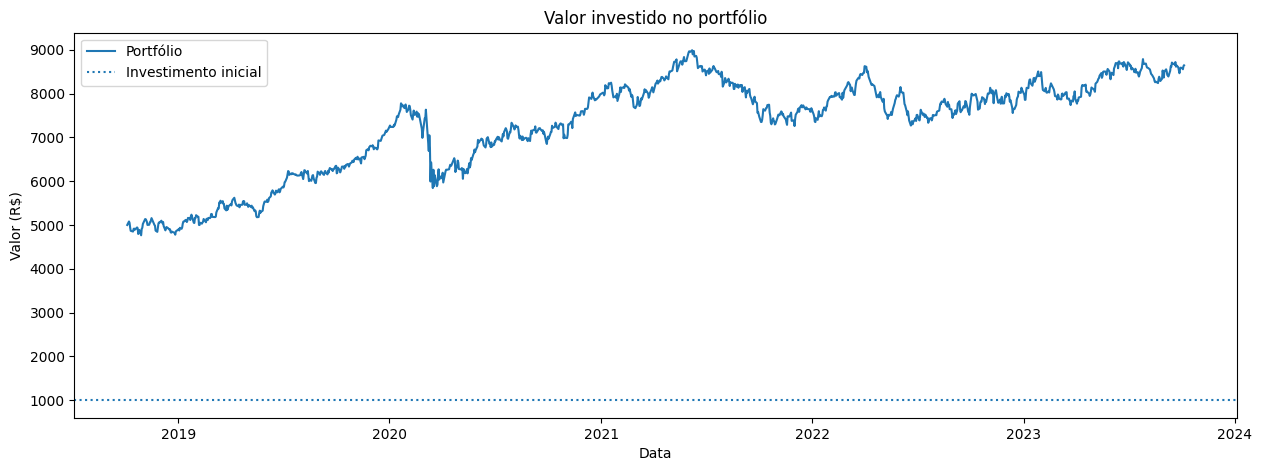

In [140]:
plt.figure(figsize=(15,5))
plt.plot(portfolio, label='Portfólio')
plt.axhline(data['Valor investido'], linestyle=':', label='Investimento inicial')
plt.title('Valor investido no portfólio')
plt.ylabel('Valor (R\$)')
plt.xlabel('Data')
plt.legend()
plt.show()

## Visualizando variação diária das ações do portfólio

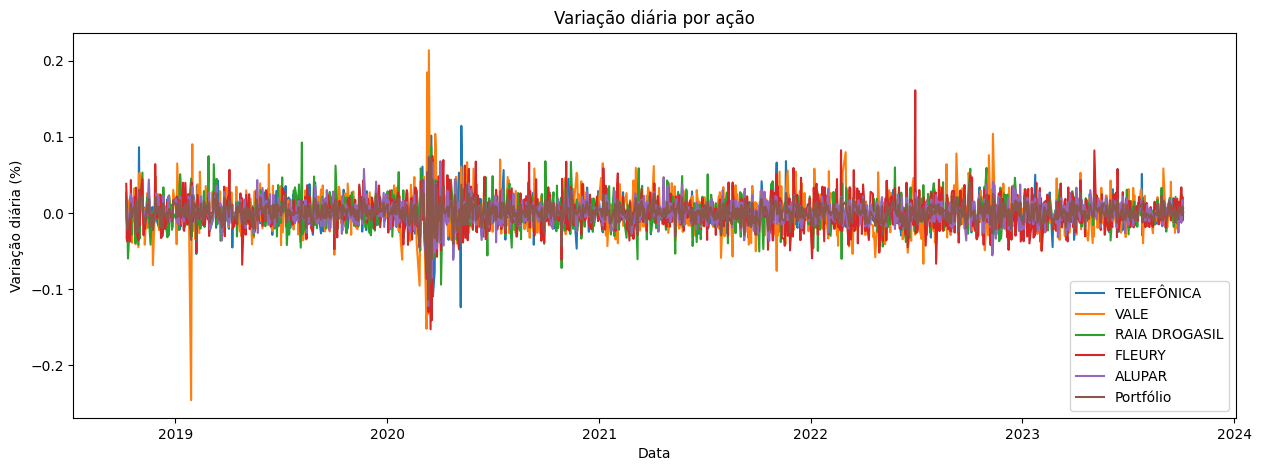

In [141]:
plt.figure(figsize=(15,5))
for i in range(len(data_portfolio)):
    plt.plot(data_portfolio[i]['Rentabilidade diária'], label=data_portfolio[i]['Ação'])
plt.plot(portfolio.ffill(axis=0).pct_change(), label='Portfólio')
plt.title('Variação diária por ação')
plt.ylabel('Variação diária (%)')
plt.xlabel('Data')
plt.legend()
plt.show()

## Visualizando informações sobre as ações individuais e sobre o portfólio

In [142]:
for acao in data_portfolio:
    print(acao['Ação'])
    print('Valor investido: R$ {:.2f}'.format(acao['Valor investido']))
    print('Valor final: R$ {:.2f}'.format(acao['Valor final']))
    print('Rentabilidade geral: {:.2f}%'.format(acao['Rentabilidade geral'] * 100))
    print('Índice Sharpee: {:.2f}'.format(acao['Índice Sharpee']))
    print('')
print('Portfólio')
print('Valor investido: R$ {:.2f}'.format(1000 * len(data_portfolio)))
print('Valor final: R$ {:.2f}'.format(portfolio.iloc[-1]))
print('Rentabilidade geral: {:.2f}%'.format((portfolio.iloc[-1] / (1000 * len(data_portfolio)) - 1) * 100)) 
print('Índice Sharpee: {:.2f}'.format((portfolio.iloc[-1] / (1000 * len(data_portfolio)) - 1) / portfolio.ffill(axis=0).pct_change().std()))


TELEFÔNICA
Valor investido: R$ 1000.00
Valor final: R$ 1714.23
Rentabilidade geral: 71.42%
Índice Sharpee: 41.19

VALE
Valor investido: R$ 1000.00
Valor final: R$ 1674.54
Rentabilidade geral: 67.45%
Índice Sharpee: 26.34

RAIA DROGASIL
Valor investido: R$ 1000.00
Valor final: R$ 2056.35
Rentabilidade geral: 105.63%
Índice Sharpee: 52.11

FLEURY
Valor investido: R$ 1000.00
Valor final: R$ 947.76
Rentabilidade geral: -5.22%
Índice Sharpee: -2.35

ALUPAR
Valor investido: R$ 1000.00
Valor final: R$ 2251.68
Rentabilidade geral: 125.17%
Índice Sharpee: 81.04

Portfólio
Valor investido: R$ 5000.00
Valor final: R$ 8643.73
Rentabilidade geral: 72.87%
Índice Sharpee: 57.67


## Calculando valores do portfólio ao adicionar mais ações

In [143]:
portfolio = 0
portfolio += data_portfolio[0]['Valor por dia'] # TELEFÔNICA - Setor de telecomunicações
ind_sharpee_1_acao = (portfolio.iloc[-1] / (1000 * 1) - 1) / portfolio.ffill(axis=0).pct_change().std()
print('Índice Sharpee do Portfólio com 1 ação: {:.2f}'.format(ind_sharpee_1_acao))

media_ind_sharpee_1_acao = 0
for i in range(1):
    media_ind_sharpee_1_acao += data_portfolio[i]['Índice Sharpee']

Índice Sharpee do Portfólio com 1 ação: 41.19


In [144]:
portfolio += data_portfolio[1]['Valor por dia'] # VALE - Setor de mineração
ind_sharpee_2_acoes = (portfolio.iloc[-1] / (1000 * 2) - 1) / portfolio.ffill(axis=0).pct_change().std()
print('Índice Sharpee do Portfólio com 2 ações: {:.2f}'.format(ind_sharpee_2_acoes))

media_ind_sharpee_2_acoes = 0
for i in range(2):
    media_ind_sharpee_2_acoes += data_portfolio[i]['Índice Sharpee']
media_ind_sharpee_2_acoes /= 2

Índice Sharpee do Portfólio com 2 ações: 41.72


In [145]:
portfolio += data_portfolio[2]['Valor por dia'] # RAIA DROGASIL - Setor de farmácias
ind_sharpee_3_acoes = (portfolio.iloc[-1] / (1000 * 3) - 1) / portfolio.ffill(axis=0).pct_change().std()
print('Índice Sharpee do Portfólio com 3 ações: {:.2f}'.format(ind_sharpee_3_acoes))

media_ind_sharpee_3_acoes = 0
for i in range(3):
    media_ind_sharpee_3_acoes += data_portfolio[i]['Índice Sharpee']
media_ind_sharpee_3_acoes /= 3

Índice Sharpee do Portfólio com 3 ações: 57.70


In [146]:
portfolio += data_portfolio[3]['Valor por dia'] # FLEURY - Setor de laboratórios
ind_sharpee_4_acoes = (portfolio.iloc[-1] / (1000 * 4) - 1) / portfolio.ffill(axis=0).pct_change().std()
print('Índice Sharpee do Portfólio com 4 ações: {:.2f}'.format(ind_sharpee_4_acoes))

media_ind_sharpee_4_acoes = 0
for i in range(4):
    media_ind_sharpee_4_acoes += data_portfolio[i]['Índice Sharpee']
media_ind_sharpee_4_acoes /= 4

Índice Sharpee do Portfólio com 4 ações: 43.62


In [147]:
portfolio += data_portfolio[4]['Valor por dia'] # WEG - Setor de equipamentos eletrônicos
ind_sharpee_5_acoes = (portfolio.iloc[-1] / (1000 * 5) - 1) / portfolio.ffill(axis=0).pct_change().std()
print('Índice Sharpee do Portfólio com 5 ações: {:.2f}'.format(ind_sharpee_5_acoes))

media_ind_sharpee_5_acoes = 0
for i in range(5):
    media_ind_sharpee_5_acoes += data_portfolio[i]['Índice Sharpee']
media_ind_sharpee_5_acoes /= 5

Índice Sharpee do Portfólio com 5 ações: 57.67


## Visualizando Índice Sharpee do portfólio ao adicionar mais ações

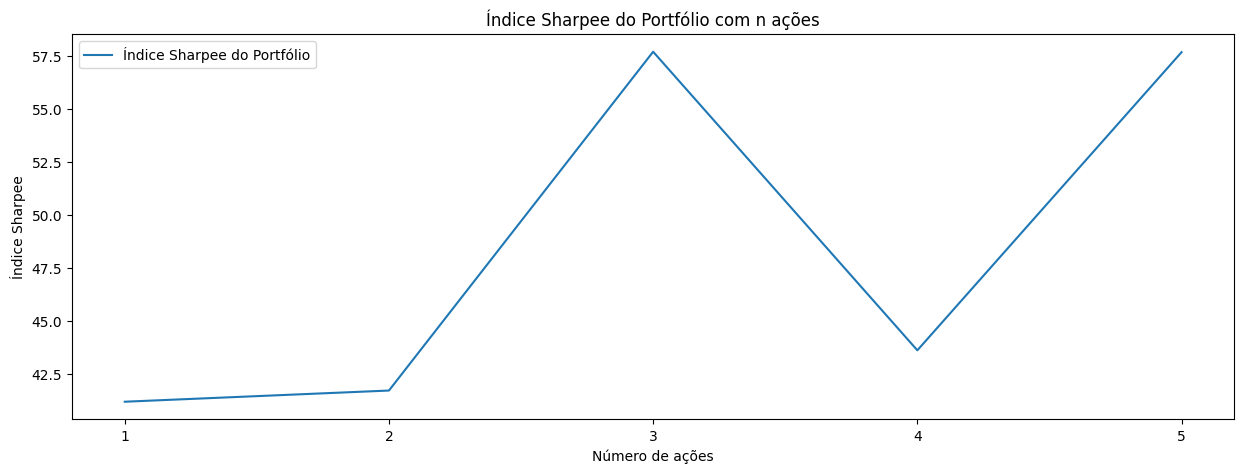

In [148]:
plt.figure(figsize=(15,5))
plt.plot(['1','2','3','4','5'], [ind_sharpee_1_acao, ind_sharpee_2_acoes, ind_sharpee_3_acoes, ind_sharpee_4_acoes, ind_sharpee_5_acoes], label='Índice Sharpee do Portfólio')
plt.legend()
plt.title('Índice Sharpee do Portfólio com n ações')
plt.ylabel('Índice Sharpee')
plt.xlabel('Número de ações')
plt.show()

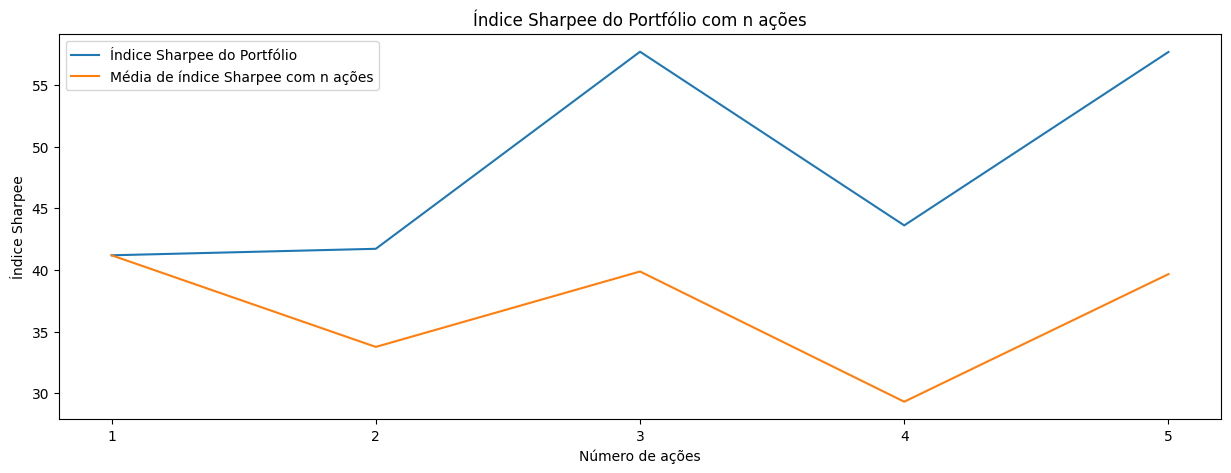

In [149]:
plt.figure(figsize=(15,5))
plt.plot(['1','2','3','4','5'], [ind_sharpee_1_acao, ind_sharpee_2_acoes, ind_sharpee_3_acoes, ind_sharpee_4_acoes, ind_sharpee_5_acoes], label='Índice Sharpee do Portfólio')
plt.plot(['1','2','3','4','5'], [media_ind_sharpee_1_acao, media_ind_sharpee_2_acoes, media_ind_sharpee_3_acoes, media_ind_sharpee_4_acoes, media_ind_sharpee_5_acoes], label='Média de índice Sharpee com n ações')
plt.legend()
plt.title('Índice Sharpee do Portfólio com n ações')
plt.ylabel('Índice Sharpee')
plt.xlabel('Número de ações')
plt.show()